In [7]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import tensorflow as tf
from tqdm import tqdm
import itertools
from tensorflow.keras.models import load_model
import random
from tensorflow.keras.preprocessing import image
from matplotlib import interactive
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import TensorBoard
import pickle
import time
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import backend as K
import matplotlib.image as mpimg


pickle_in = open("X1.pickle","rb")
X = pickle.load(pickle_in)
pickle_in = open("y1.pickle","rb")
y = pickle.load(pickle_in)
from tensorflow.keras.utils import to_categorical
X = X/255.0


model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', padding="same", input_shape=X.shape[1:]))
model.add(Conv2D(32, (3, 3), padding="same", activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu', padding="same"))
model.add(Conv2D(64, (3, 3), padding="same", activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu', padding="same"))
model.add(Conv2D(64, (3, 3), padding="same", activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), dilation_rate=(2, 2), activation='relu', padding="same"))
model.add(Conv2D(128, (3, 3), padding="valid", activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), dilation_rate=(2, 2), activation='relu', padding="same"))
model.add(Conv2D(128, (3, 3), padding="valid", activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(512, activation='relu'))
model.add(Dense(3 , activation='softmax'))

optimizer='Adam'
loss='categorical_crossentropy'
metrics=['accuracy']



model.compile(optimizer, loss=loss, metrics=metrics)


history=model.fit(
  X,
  to_categorical(y),
  epochs=20,
  validation_split=0.21);


print(model.summary())
model.save('Covid_Phenomena_1.model')

Train on 753 samples, validate on 201 samples
Epoch 1/20
753/753 [==============================] - 44s 58ms/sample - loss: 1.1021 - accuracy: 0.3453 - val_loss: 1.0993 - val_accuracy: 0.3333
Epoch 2/20
753/753 [==============================] - 48s 63ms/sample - loss: 1.0996 - accuracy: 0.3293 - val_loss: 1.0976 - val_accuracy: 0.3383
Epoch 3/20
753/753 [==============================] - 42s 56ms/sample - loss: 0.9614 - accuracy: 0.5232 - val_loss: 0.4885 - val_accuracy: 0.8109
Epoch 4/20
753/753 [==============================] - 45s 60ms/sample - loss: 0.3726 - accuracy: 0.8579 - val_loss: 0.3025 - val_accuracy: 0.8806
Epoch 5/20
753/753 [==============================] - 47s 62ms/sample - loss: 0.2840 - accuracy: 0.9017 - val_loss: 0.2969 - val_accuracy: 0.8856
Epoch 6/20
753/753 [==============================] - 42s 55ms/sample - loss: 0.1529 - accuracy: 0.9442 - val_loss: 0.2054 - val_accuracy: 0.9353
Epoch 7/20
753/753 [==============================] - 36s 48ms/sample - loss: 

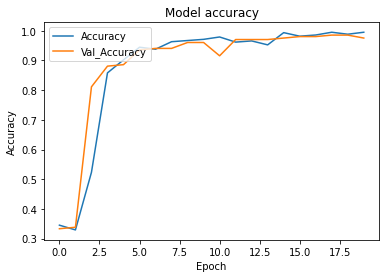

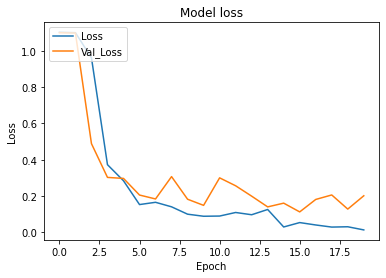

In [8]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Covid_Phenomena_1 Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Accuracy', 'Val_Accuracy'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Covid_Phenomena_1Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Loss', 'Val_Loss'], loc='upper left')
plt.show()